## Question 8: Mobile Phone Specifications & Prices

#### 0. Import the data

In [4]:
import pandas as pd

data = pd.read_csv("ndtv_data_final.csv", usecols=lambda column: column not in ['Unnamed: 0'])
data.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


#### 1. Create dummy variables

In [7]:
import numpy as np

df_w_dummies = pd.get_dummies(
    data,
    columns=[
        'Touchscreen',
        'Processor',
        'Operating system',
        'Wi-Fi',
        'Bluetooth',
        'GPS',
        'Number of SIMs',
        '3G',
        '4G/ LTE'
        ],
    drop_first=True
    )

# Get the dummy columns where the type is 'bool'
dummy_columns = df_w_dummies.select_dtypes(include='bool').columns
# Convert type from 'bool' to 'int'
df_w_dummies[dummy_columns] = df_w_dummies[dummy_columns].astype(int)

#### 2. Convert the price columns to US dollars. Apply the natural logarithm to the price column.

In [10]:
df_w_dummies["Price"] = df_w_dummies["Price"] * 0.021
df_w_dummies['Price_LOG'] = df_w_dummies['Price'].apply(lambda x: np.log(x))
df_w_dummies

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,RAM (MB),Internal storage (GB),Rear camera,...,Operating system_Windows,Operating system_iOS,Wi-Fi_Yes,Bluetooth_Yes,GPS_Yes,Number of SIMs_2,Number of SIMs_3,3G_Yes,4G/ LTE_Yes,Price_LOG
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,1440,3120,12000,256.000,48.0,...,0,0,1,1,1,1,0,1,1,7.122026
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,1080,2400,6000,64.000,64.0,...,0,0,1,1,1,1,0,1,1,6.376691
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,1242,2688,4000,64.000,12.0,...,0,1,1,1,1,1,0,1,1,7.716416
3,iPhone 11,Apple,iPhone 11,3110,6.10,828,1792,4000,64.000,12.0,...,0,1,1,1,1,1,0,1,1,7.186069
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,1080,2340,6000,128.000,12.0,...,0,0,1,1,1,0,0,0,0,6.956345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,Intex Aqua A2,Intex,Aqua A2,1500,4.00,480,800,512,8.000,5.0,...,0,0,1,1,1,1,0,1,0,3.999649
1355,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,480,854,1000,8.000,8.0,...,0,0,1,1,1,1,0,1,0,4.122932
1356,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,480,854,512,4.000,5.0,...,0,0,1,1,0,1,0,1,0,4.142801
1357,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,480,800,256,0.512,2.0,...,0,0,1,1,1,1,0,1,0,3.960013


#### 3. Produce a summary statistics using describe().T

In [13]:
df_w_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
Battery capacity (mAh),1359.0,2938.489330,873.514133,1010.000000,2300.000000,3000.00000,3500.000000,6000.000000
Screen size (inches),1359.0,5.291310,0.671357,2.400000,5.000000,5.20000,5.700000,7.300000
Resolution x,1359.0,811.543046,270.707271,240.000000,720.000000,720.00000,1080.000000,2160.000000
Resolution y,1359.0,1490.777778,557.780120,320.000000,1280.000000,1280.00000,1920.000000,3840.000000
RAM (MB),1359.0,2488.777778,1664.440386,64.000000,1000.000000,2000.00000,3000.000000,12000.000000
Internal storage (GB),1359.0,30.654864,36.950241,0.064000,8.000000,16.00000,32.000000,512.000000
Rear camera,1359.0,12.070199,8.948337,0.000000,8.000000,12.20000,13.000000,108.000000
Front camera,1359.0,7.037969,6.295448,0.000000,2.000000,5.00000,8.000000,48.000000
Price,1359.0,240.782338,291.007439,10.374000,100.033500,146.97900,251.979000,3674.790000
Touchscreen_Yes,1359.0,0.987491,0.111184,0.000000,1.000000,1.00000,1.000000,1.000000


#### 4. Assign $(y, X)$

In [16]:
import numpy as np

y = df_w_dummies["Price_LOG"]
X = df_w_dummies.drop(columns=['Price', 'Price_LOG', 'Name', 'Brand', 'Model'])

#### 5. Split the dataset into training and testing

In [153]:
from sklearn.model_selection import train_test_split
import warnings

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 6. Construct a stepwise procedure and find the best model based on adjusted R-squared criteria. Print the list of feature for the best model.

In [262]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score

def calculate_r2_adj(model, X, y):
    r2 = r2_score(y, model.predict(X))
    n = X.shape[0]
    p = X.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return r2_adj

model = LinearRegression()

sfs = SequentialFeatureSelector(
    model,
    k_features = (1, 20),
    forward = True,
    floating = False,
    scoring = lambda estimator, X, y: calculate_r2_adj(estimator, X, y),
    cv = 5,
    n_jobs = 30
)

sfs = sfs.fit(X_train, y_train)
selected_features = list(sfs.k_feature_names_)

# Print selected features
print("Features for the best model: ", selected_features)

Features for the best model:  ['Resolution x', 'Resolution y', 'RAM (MB)', 'Internal storage (GB)', 'Operating system_Windows', 'Operating system_iOS', 'GPS_Yes', 'Number of SIMs_2']


#### 7. Estimate the linear model using the selected features in statsmodels. Print the results.

In [265]:
import statsmodels.api as sm

selected_features = list(sfs.k_feature_names_)
X_selected_train = X_train[selected_features]
X_selected_test = X_test[selected_features]

X_selected_train = sm.add_constant(X_selected_train)
model = sm.OLS(y_train, X_selected_train).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_LOG   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     213.0
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          2.77e-205
Time:                        10:51:38   Log-Likelihood:                -601.34
No. Observations:                 951   AIC:                             1221.
Df Residuals:                     942   BIC:                             1264.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### 8. Print and review the top 10 models based on adjusted R-squared criteria.

In [278]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score

feature_subsets = sfs.subsets_

subsets_df = pd.DataFrame([
    {
        'Number of Features': len(feature_subsets[k]['feature_idx']),
        'Features': feature_subsets[k]['feature_names'],
        'avg_score': feature_subsets[k]['avg_score']
    }
    for k in feature_subsets
])

# Sort models by adjusted R-squared in descending order and select the top 10
top_models = subsets_df.sort_values(by='avg_score', ascending=False).head(10)
top_models.reset_index(drop=True, inplace=True)
top_models

,Number of Features,Features,avg_score
0,8,"(Resolution x, Resolution y, RAM (MB), Interna...",0.615958
1,7,"(Resolution x, Resolution y, RAM (MB), Interna...",0.615810
2,9,"(Resolution x, Resolution y, RAM (MB), Interna...",0.614483
3,6,"(Resolution x, Resolution y, RAM (MB), Interna...",0.614140
4,10,"(Resolution x, Resolution y, RAM (MB), Interna...",0.612789
5,5,"(Resolution x, Resolution y, RAM (MB), Operati...",0.611893
6,11,"(Resolution x, Resolution y, RAM (MB), Interna...",0.611142
7,4,"(Resolution y, RAM (MB), Operating system_iOS,...",0.610119
8,12,"(Resolution x, Resolution y, RAM (MB), Interna...",0.609158
9,13,"(Resolution x, Resolution y, RAM (MB), Interna...",0.607121


#### 9. Plot (scatter) the adjusted R-squared criteria by number of featrues.

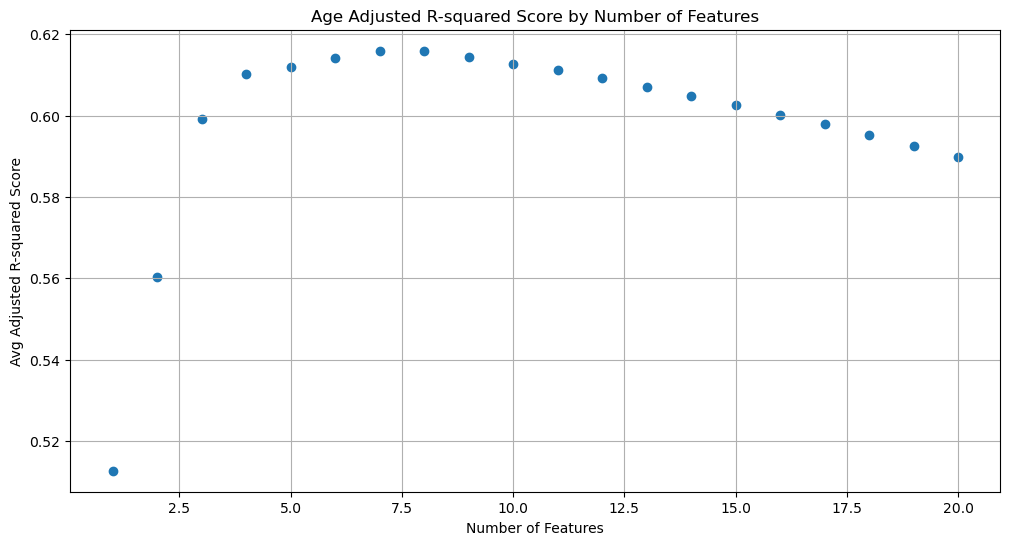

In [280]:
import matplotlib.pyplot as plt

subsets_df_sorted = subsets_df.sort_values(by='avg_score', ascending=False)

plt.figure(figsize=(12, 6))
plt.scatter(subsets_df_sorted['Number of Features'], subsets_df_sorted['avg_score'])
plt.xlabel('Number of Features')
plt.ylabel('Avg Adjusted R-squared Score')
plt.title('Age Adjusted R-squared Score by Number of Features')
plt.grid(True)
plt.show()

#### 10. Calculate BIC, AIC, RMSE, R-squared, Adjusted R-squared on training and testing datasets.

In [282]:
model_train = sm.OLS(y_train, X_selected_train).fit()
model_test = sm.OLS(y_test, X_selected_test).fit()

print('Training Datasets: ', model_train.aic, model_train.bic, model_train.rsquared, model_train.rsquared_adj)
print('Testing Datasets: ', model_test.aic, model_test.bic, model_test.rsquared, model_test.rsquared_adj)

Training Datasets:  1220.6772230769675 1264.394849639876 0.643939050668265 0.6409151784871037
Testing Datasets:  1030.97684080463 1063.0669781998633 0.9737422367872438 0.9732170815229887


#### 11. Compute the log price of the average phone in two ways:
- compute the average log price directly from the log price column;

- compute the average value of the features and predict the log price



In [221]:
# Compute the average log price directly from the log price column
print("Avarage log price from the column: ", df_w_dummies['Price_LOG'].mean())

# Compute the average value of the features and predict the log price
X_selected_train = X_train[list(sfs.k_feature_names_)]

X_selected_train_mean = X_selected_train.mean()
X_selected_train_mean_with_const = np.insert(X_selected_train_mean, 0, 1)

# Use the model to make a prediction
y_pred_mean = model.predict(X_selected_train_mean_with_const)

print("Predicted log price: ", y_pred_mean[0])

Avarage log price from the column:  5.129105826173582
Predicted log price:  5.131208194148443


169.22144694753254

#### 12. Leverage the following result to compute the predicted average price. If $y=log(Y)$ and $y~N(\mu, \sigma)$, then $E[Y]=e^{\mu+\frac{1}{2}{\sigma}^2}$

In [219]:
X_selected_train_with_const = sm.add_constant(X_selected_train)

residuals = y_train - model.predict(X_selected_train_with_const)

n = len(y_train)  # Number of observations
p = X_selected_train.shape[1] - 1  # Number of predictors, minus 1 for the constant term
mu = np.mean(model.predict(X_selected_train_with_const))

residual_variance = np.sum(residuals ** 2) / (n - p - 1)

E_Y = np.exp(mu + 0.5 * residual_variance)
print("Predicted Average Price (E[Y]):", E_Y)

Predicted Average Price (E[Y]): 187.87460316043848


#### 13. Compute the percentage increase in the price due to having the GPS feature versus not assuming average value for all other features. How does it compare with the GPS_Yes coefficient?

In [233]:
# Calculate the mean of each input feature
X_mean = X_selected_train.mean()

# Create two sets of input data - GPS_Yes = 0 & GPS_Yes = 1
X_mean_with_GPS_0 = X_mean.copy()
X_mean_with_GPS_1 = X_mean.copy()

X_mean_with_GPS_0['GPS_Yes'] = 0  # Set GPS_Yes to 0
X_mean_with_GPS_1['GPS_Yes'] = 1  # Set GPS_Yes to 1

# Add the constant term to both sets of input data
X_mean_with_GPS_0 = np.insert(X_mean_with_GPS_0, 0, 1)
X_mean_with_GPS_1 = np.insert(X_mean_with_GPS_1, 0, 1)

# Get the predicted log prices (u values) for both cases
predicted_y_0 = model.predict(X_mean_with_GPS_0)[0]  # u for GPS_Yes = 0
predicted_y_1 = model.predict(X_mean_with_GPS_1)[0]  # u for GPS_Yes = 1

price_0 = np.exp(predicted_y_0 + 0.5 * residual_variance)
price_1 = np.exp(predicted_y_1 + 0.5 * residual_variance)

# Calculate the percentage increase
percentage_difference = ((price_1 - price_0) / price_0) * 100

print("Price with GPS (price_1):", price_1)
print("Price without GPS (price_0):", price_0)
print("Percentage Difference in Price due to GPS:", percentage_difference, "%")

Price with GPS (price_1): 190.5960053917153
Price without GPS (price_0): 158.43381432240542
Percentage Difference in Price due to GPS: 20.30008000934782 %


#### 14. Compute the percentage increase in the price due to having the iOS system versus not assuming average value for all other features (hint: need to set Windows iOS system dummy to zero). How does it compare with the Operating System_iOS coefficient? Are the numbers close? If so, why? If not, why?

In [240]:
#Similar to q13, except set Operating system_Windows to 0 for both scenarios when Operating system_IOS is 1 and 0

X_mean = X_selected_train.mean()

X_mean_with_IOS_0 = X_mean.copy()
X_mean_with_IOS_1 = X_mean.copy()

X_mean_with_IOS_0['Operating system_Windows'] = 0 
X_mean_with_IOS_1['Operating system_Windows'] = 0 
X_mean_with_IOS_0['Operating system_iOS'] = 0 
X_mean_with_IOS_1['Operating system_iOS'] = 1 

# Add the constant term to both sets of input data
X_mean_with_IOS_0 = np.insert(X_mean_with_IOS_0, 0, 1)
X_mean_with_IOS_1 = np.insert(X_mean_with_IOS_1, 0, 1)

# Get the predicted log prices (u values) for both cases
predicted_y_0 = model.predict(X_mean_with_IOS_0)[0]  # u for GPS_Yes = 0
predicted_y_1 = model.predict(X_mean_with_IOS_1)[0]  # u for GPS_Yes = 1

price_0 = np.exp(predicted_y_0 + 0.5 * residual_variance)
price_1 = np.exp(predicted_y_1 + 0.5 * residual_variance)

# Calculate the percentage increase
percentage_difference = ((price_1 - price_0) / price_0) * 100

print("Price with iOS system (price_1):", price_1)
print("Price without iOS system (price_0):", price_0)
print("Percentage Difference in Price due to iOS system:", percentage_difference, "%")

Price with iOS system (price_1): 665.1847945601828
Price without iOS system (price_0): 183.61412605829523
Percentage Difference in Price due to iOS system: 262.2732133087597 %


#### 15. Rerun step 6-10 using BIC as the criteria. Is the final model the same as the one under the adjusted R-squared criteria? If not, which final model would you select? Why?

In [284]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score

def calculate_bic(model, X, y):
    n = X.shape[0]
    y_pred = model.predict(X)
    residual_sum_of_squares = np.sum((y - y_pred) ** 2)
    num_params = X.shape[1] + 1
    bic = n * np.log(residual_sum_of_squares / n) + num_params * np.log(n)
    return bic

model = LinearRegression()

sfs = SequentialFeatureSelector(
    model,
    k_features = (1, 20),
    forward = True,
    floating = False,
    scoring = lambda estimator, X, y: -calculate_bic(estimator, X, y),
    cv = 5,
    n_jobs = 30
)

sfs = sfs.fit(X_train, y_train)
selected_features = list(sfs.k_feature_names_)

# Print selected features
print("Features for the best model: ", selected_features)

Features for the best model:  ['Resolution y', 'RAM (MB)', 'Operating system_iOS', 'Number of SIMs_2']


In [286]:
import statsmodels.api as sm

selected_features = list(sfs.k_feature_names_)
X_selected_train = X_train[selected_features]
X_selected_test = X_test[selected_features]

X_selected_train = sm.add_constant(X_selected_train)
model = sm.OLS(y_train, X_selected_train).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_LOG   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     395.0
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          5.07e-200
Time:                        14:40:06   Log-Likelihood:                -625.32
No. Observations:                 951   AIC:                             1261.
Df Residuals:                     946   BIC:                             1285.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.1200 

In [292]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score

feature_subsets = sfs.subsets_

subsets_df = pd.DataFrame([
    {
        'Number of Features': len(feature_subsets[k]['feature_idx']),
        'Features': feature_subsets[k]['feature_names'],
        'avg_score': feature_subsets[k]['avg_score']
    }
    for k in feature_subsets
])

# Sort models by adjusted R-squared in descending order and select the top 10
top_models = subsets_df.sort_values(by='avg_score', ascending=True).head(10)
top_models.reset_index(drop=True, inplace=True)
top_models

,Number of Features,Features,avg_score
0,20,"(Battery capacity (mAh), Resolution x, Resolut...",187.461037
1,19,"(Battery capacity (mAh), Resolution x, Resolut...",192.860082
2,18,"(Battery capacity (mAh), Resolution x, Resolut...",198.239974
3,17,"(Resolution x, Resolution y, RAM (MB), Interna...",203.607019
4,16,"(Resolution x, Resolution y, RAM (MB), Interna...",208.933915
5,15,"(Resolution x, Resolution y, RAM (MB), Interna...",214.195455
6,14,"(Resolution x, Resolution y, RAM (MB), Interna...",219.449470
7,13,"(Resolution x, Resolution y, RAM (MB), Interna...",224.701743
8,12,"(Resolution x, Resolution y, RAM (MB), Interna...",229.858130
9,1,"(Resolution y,)",232.906150


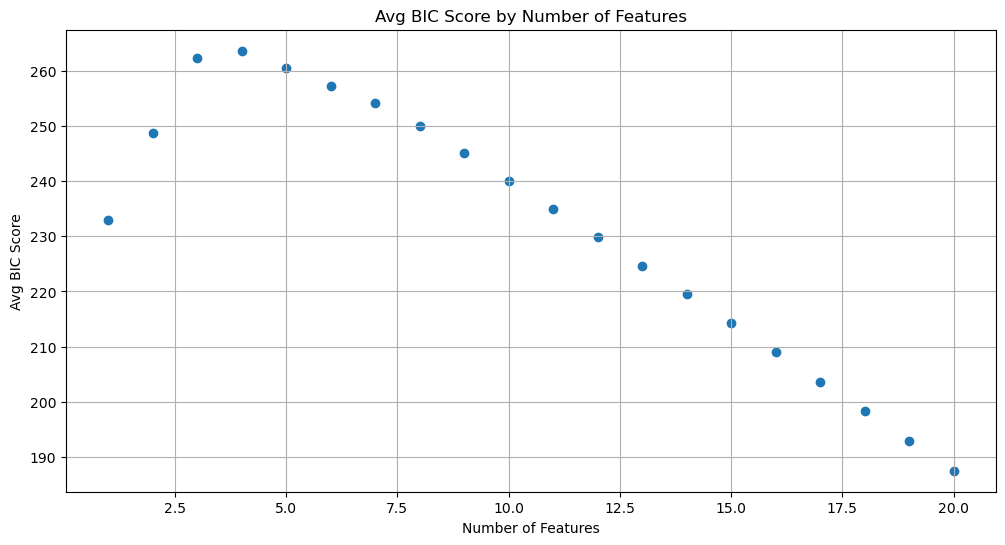

In [294]:
import matplotlib.pyplot as plt

subsets_df_sorted = subsets_df.sort_values(by='avg_score', ascending=True)

plt.figure(figsize=(12, 6))
plt.scatter(subsets_df_sorted['Number of Features'], subsets_df_sorted['avg_score'])
plt.xlabel('Number of Features')
plt.ylabel('Avg BIC Score')
plt.title('Avg BIC Score by Number of Features')
plt.grid(True)
plt.show()

In [296]:
model_train = sm.OLS(y_train, X_selected_train).fit()
model_test = sm.OLS(y_test, X_selected_test).fit()

print('Training Datasets: ', model_train.aic, model_train.bic, model_train.rsquared, model_train.rsquared_adj)
print('Testing Datasets: ', model_test.aic, model_test.bic, model_test.rsquared, model_test.rsquared_adj)

Training Datasets:  1260.646346315388 1284.933916628115 0.6255184108397269 0.6239349791730873
Testing Datasets:  1191.5170312609785 1207.5620999585951 0.9603119399181475 0.9599189888282281
